In [1]:
import numpy as np 
import osmnx as osm
import networkx as nx
import matplotlib.pyplot as plt
import pickle
from fn_lib import *
from tqdm import tqdm
plt.rcParams['text.usetex'] = True
%run fn_lib.py

# Load Data

In [3]:
city_codes = [
    "DEL",
    "MUM",
    "KOL",
    "CHE",
    "BLR",
    "HYD",
    "PUN",
    "AHM",
    "JAI",
    "CHD",
    "LKO",
    "COK",
    "BPL",
    "IND",
    "NAG",
    "VIZ"
]

In [5]:
for city in city_codes:
    G = OpenGraph(city)
    V= nx.number_of_nodes(G)
    print(city, V)

DEL 183351
MUM 25612
KOL 35703
CHE 68414
BLR 154496
HYD 137247
PUN 32909
AHM 67816
JAI 110261
CHD 12137
LKO 69244
COK 13788
BPL 66036
IND 66250
NAG 39852
VIZ 38567


100%|██████████| 16/16 [01:22<00:00,  5.18s/it]


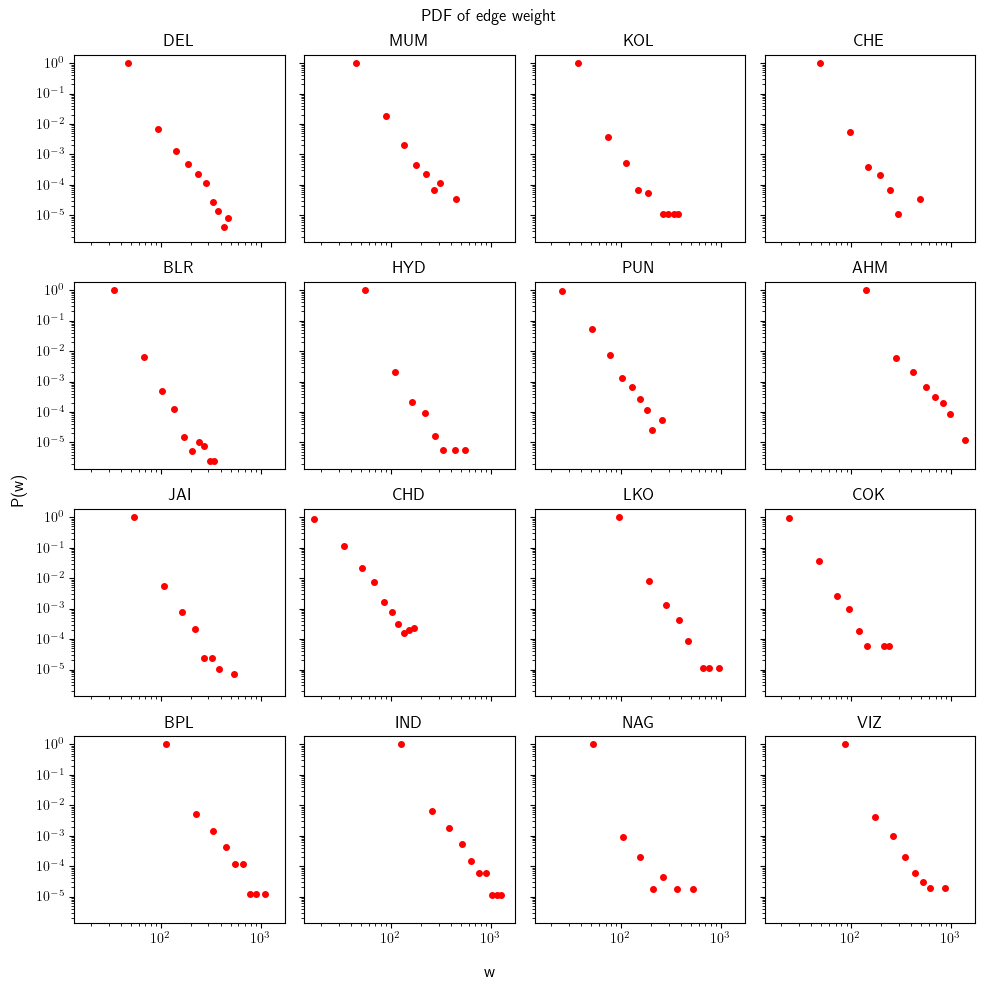

In [11]:
a, b = wPDF(city_codes)
a.supxlabel("w")        # common X label
a.supylabel("P(w)")     # common Y label
    
a.suptitle("PDF of edge weight")
a.tight_layout()
a.savefig("time_dist.png", dpi=450)

# Analysis

## Occupancy distribution for sync-random walk. 

In [20]:
def OccPDF(X):
    counts = np.bincount(X.ravel())
    P = counts/counts.sum()
    P = P[P>0]
    rankdP = np.sort(P)[::-1]
    
    ranks = np.arange(1, len(rankdP)+1)
    
    fig,ax = plt.subplots(figsize=(5,5))
    plt.loglog(ranks, rankdP, 'o-',
                markersize=5, 
                fillstyle='none',
                color = 'blue')
    ax.set_xlabel("Rank")
    ax.set_ylabel("P")
    
    plt.show
    return fig, ax

100%|██████████| 16/16 [00:32<00:00,  2.04s/it]


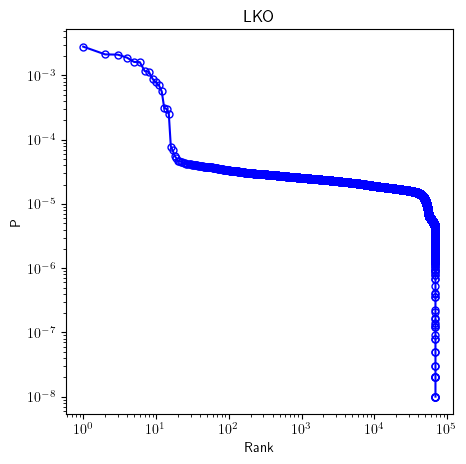

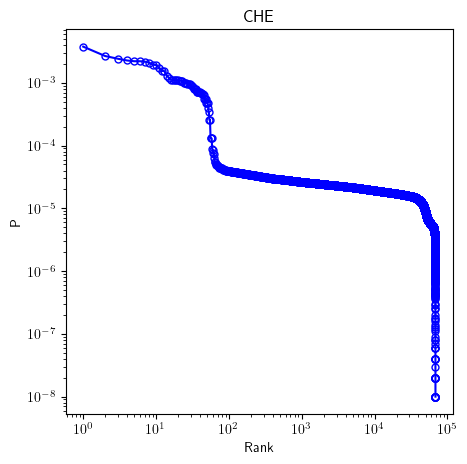

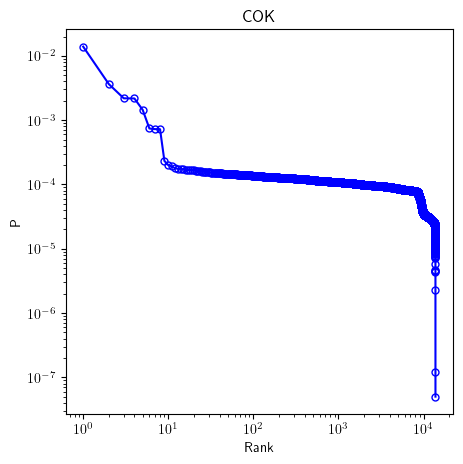

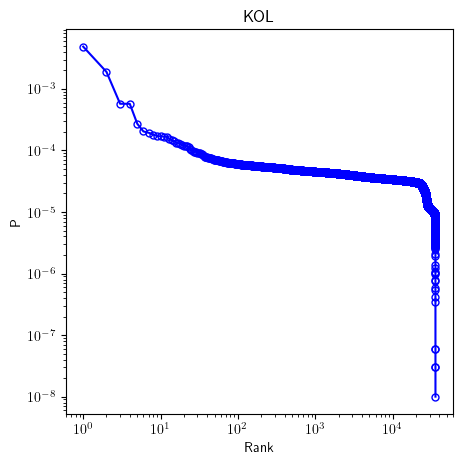

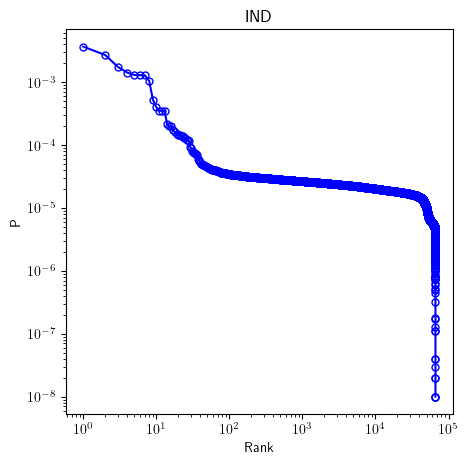

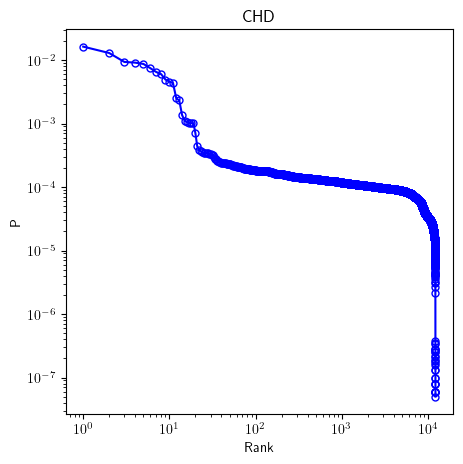

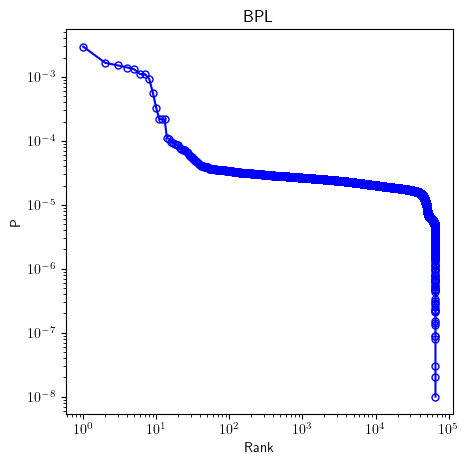

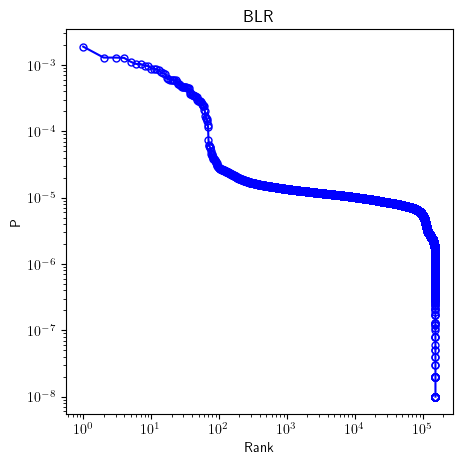

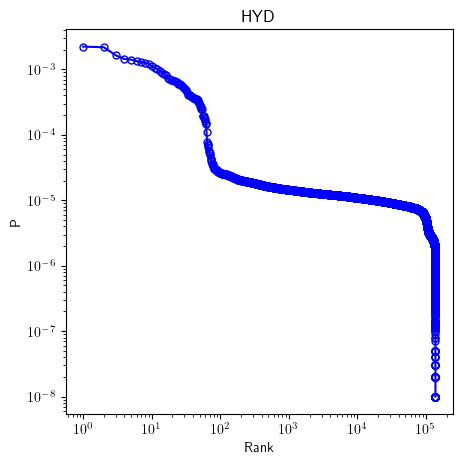

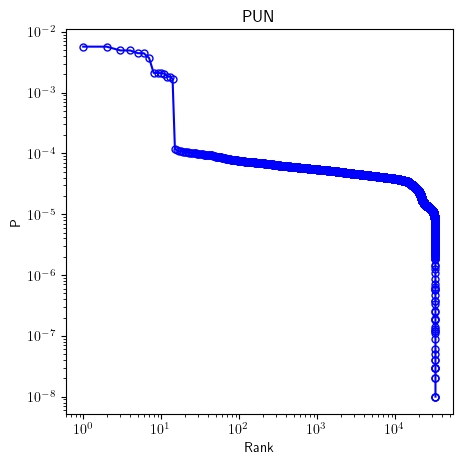

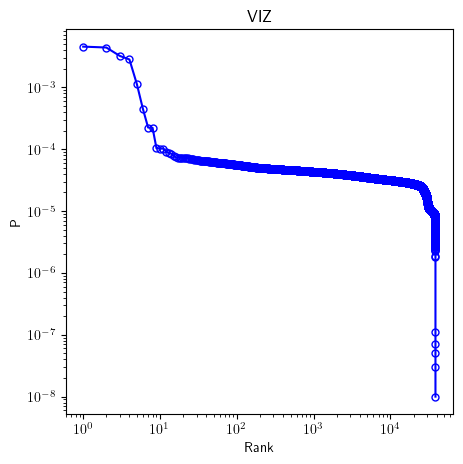

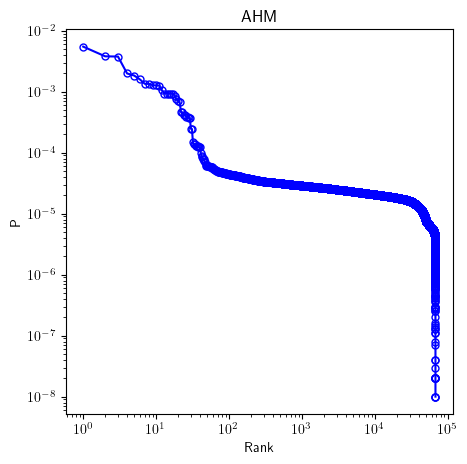

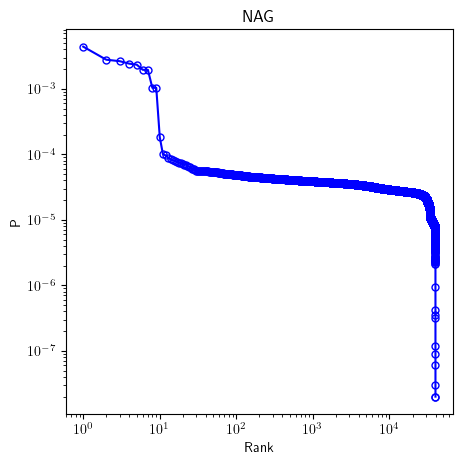

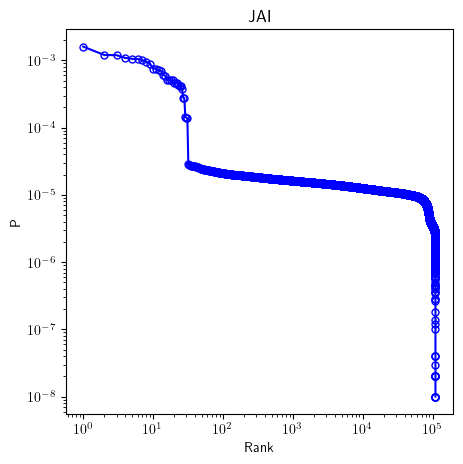

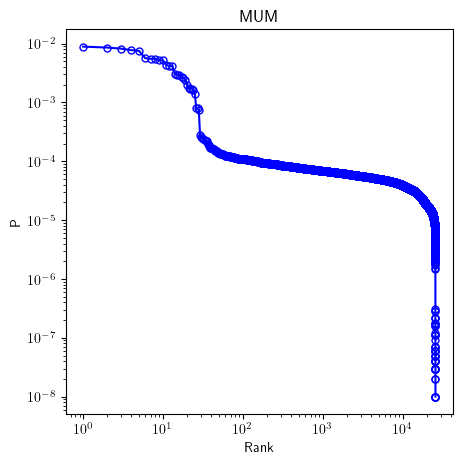

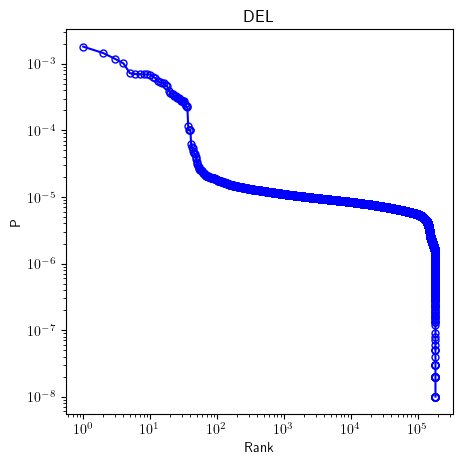

In [31]:
cities = os.listdir("./RW_data")
for city in tqdm(cities, total=len(cities)):
    X = np.load(f"./RW_data/{city}")['arr']
    fig, ax = OccPDF(X)
    ax.set_title(city[3:6])
    fig.savefig(f"./OccPDFs/{city[:-4]}.png", dpi=450)
    plt.cla
    del X

100%|██████████| 16/16 [00:26<00:00,  1.63s/it]


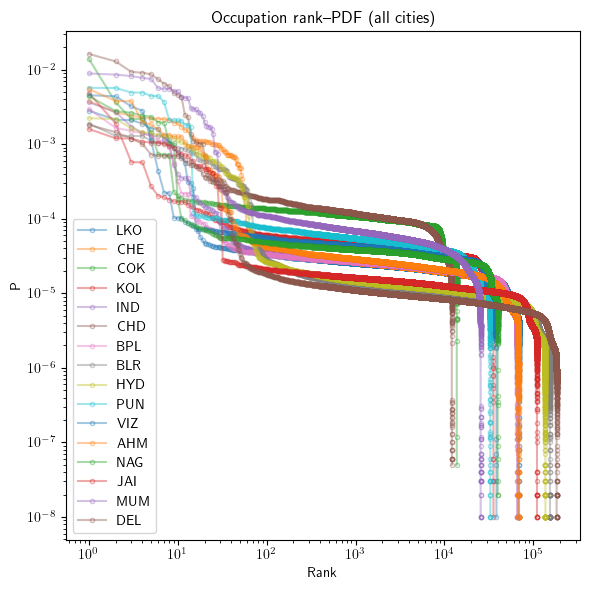

In [35]:
def OccPDF(X, ax, label=None, alpha=0.4):
    counts = np.bincount(X.ravel())
    P = counts / counts.sum()
    P = P[P > 0]

    rankdP = np.sort(P)[::-1]
    ranks = np.arange(1, len(rankdP) + 1)

    ax.loglog(
        ranks, rankdP,
        'o-', markersize=3,
        fillstyle='none',
        alpha=alpha,
        label=label
    )

cities = os.listdir("./RW_data")

fig, ax = plt.subplots(figsize=(6, 6))

for city in tqdm(cities):
    X = np.load(f"./RW_data/{city}")['arr']
    OccPDF(X, ax, label=city[3:6])
    del X

ax.set_xlabel("Rank")
ax.set_ylabel("P")
ax.set_title("Occupation rank–PDF (all cities)")
plt.legend()

# optional legend (disable if too crowded)
# ax.legend(fontsize=6, ncol=3)

fig.tight_layout()
fig.savefig("./OccPDFs/OccPDF_all_cities.png", dpi=450)
plt.show()


## On real space

In [5]:
import numpy as np

def PopNodes(RWX, q=20):
    data = np.load(f"./RW_data/{RWX}", allow_pickle=True)

    X = data["X"]
    idx2node = data["idx2node"]
    
    counts = np.bincount(X.ravel())
    P = counts / counts.sum()

    # indices with nonzero occupation
    idx = np.nonzero(P)[0]
    probs = P[idx]

    # sort by decreasing probability
    order = np.argsort(probs)[::-1]

    top_idx = idx[order][:q]
    top_probs = probs[order][:q]

    # map back to true labels
    top_nodes = np.array([idx2node[i] for i in top_idx])

    return top_nodes, top_probs


In [21]:
citycode = "MUM"
topN, topPr = PopNodes(f"RW_{citycode}_n100000_t1000.npz", q=20)
G = OpenGraph(citycode)
xs = [G.nodes[n]["x"] for n in topN]
ys = [G.nodes[n]["y"] for n in topN]


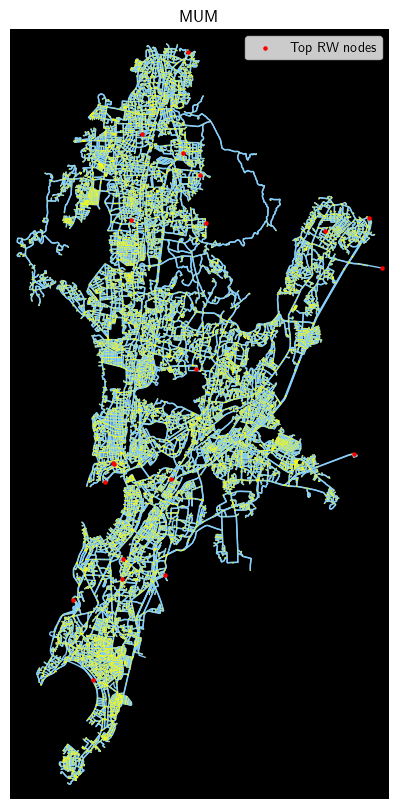

In [22]:
fig, ax = osm.plot_graph(
    G,
    figsize=(10,10),
    node_size=.5,    
    node_color="yellow",
    edge_color="lightskyblue",
    bgcolor="black",
    show=False,
    close=False
)

ax.scatter(
    xs, ys,
    c="red",
    s=5,
    zorder=5,
    label="Top RW nodes"
)

ax.legend()
plt.title(f"{citycode}")
plt.savefig(f"./topN_maps/{citycode}_RW.pdf")
plt.show()


In [17]:
fig.savefig("IND_RW.pdf")